In [54]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import confusion_matrix

In [10]:
# Import CSV
full_df = pd.read_csv('churn_clean.csv')

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [ ]:
# List columns
full_df.columns

In [11]:
# Reduce dataset to necessary columns related to research question
columns = ['Area', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek',
                   'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 
                   'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
                   'PaymentMethod', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 
                   'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']

df = full_df[columns]

C:\Users\David\AppData\Local\Temp\ipykernel_18908\1395341470.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


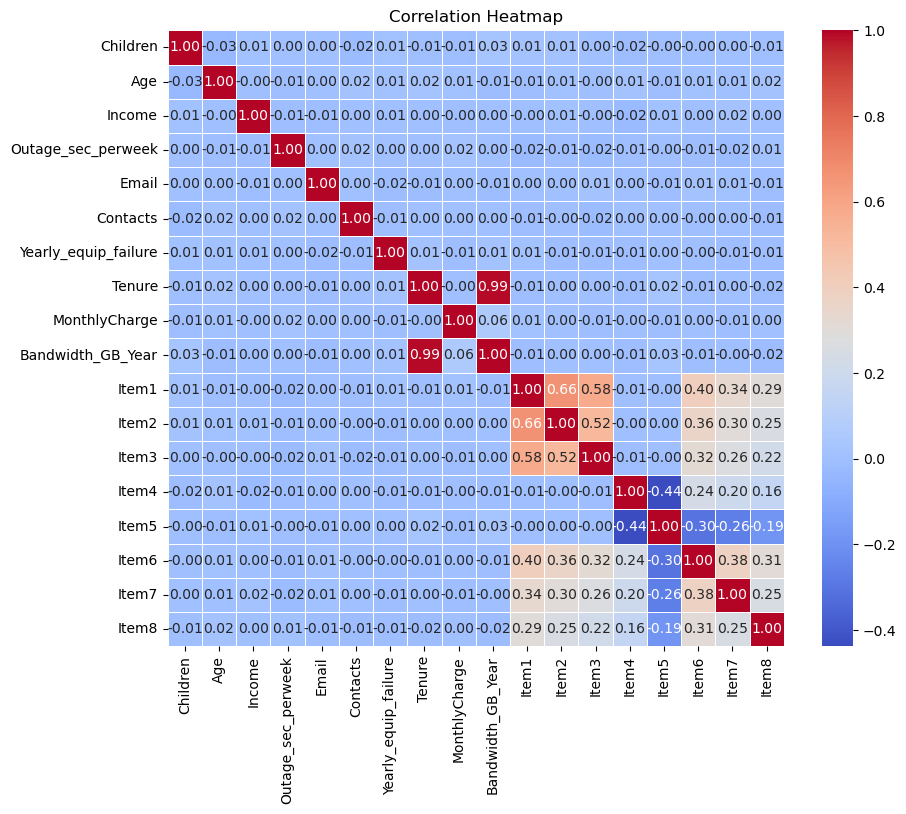

In [12]:
# Calculate the correlation matrix
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', 
            cbar=True, square=True, linewidths=.5)

plt.title('Correlation Heatmap')
plt.show()

# Check for Null values

In [13]:
# Initial check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Area                  10000 non-null  object 
 1   Children              10000 non-null  int64  
 2   Age                   10000 non-null  int64  
 3   Income                10000 non-null  float64
 4   Marital               10000 non-null  object 
 5   Gender                10000 non-null  object 
 6   Churn                 10000 non-null  object 
 7   Outage_sec_perweek    10000 non-null  float64
 8   Email                 10000 non-null  int64  
 9   Contacts              10000 non-null  int64  
 10  Yearly_equip_failure  10000 non-null  int64  
 11  Techie                10000 non-null  object 
 12  Contract              10000 non-null  object 
 13  Port_modem            10000 non-null  object 
 14  Tablet                10000 non-null  object 
 15  InternetService     

In [14]:
# Check for abnormal representations of null values. Also helps with checking for partial duplicates.
for col in columns:
    print(col)
    print(df[col].value_counts(dropna=False))
    print()
    print()

Area
Suburban    3346
Urban       3327
Rural       3327
Name: Area, dtype: int64


Children
0     2570
1     2472
2     1495
3     1472
4     1006
5      212
8      210
6      187
7      185
10      99
9       92
Name: Children, dtype: int64


Age
32    161
63    159
55    159
75    154
19    154
     ... 
50    125
47    124
71    124
78    123
59    115
Name: Age, Length: 72, dtype: int64


Income
36461.20    2
66644.71    2
61325.92    2
29353.41    2
25598.66    2
           ..
15130.44    1
20068.93    1
93936.05    1
13642.29    1
9020.92     1
Name: Income, Length: 9993, dtype: int64


Marital
Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: Marital, dtype: int64


Gender
Female       5025
Male         4744
Nonbinary     231
Name: Gender, dtype: int64


Churn
No     7350
Yes    2650
Name: Churn, dtype: int64


Outage_sec_perweek
13.419220    2
11.389730    2
10.070360    2
11.901770    2
10.488750    2
          

# Check for Complete Duplicates

In [15]:
# Check for complete duplicates
if df.duplicated().any():
    print('Has complete duplicates')
else:
    print('No complete duplicates')

No complete duplicates


# Check for Outliers


Value counts for Area
Suburban    3346
Urban       3327
Rural       3327
Name: Area, dtype: int64



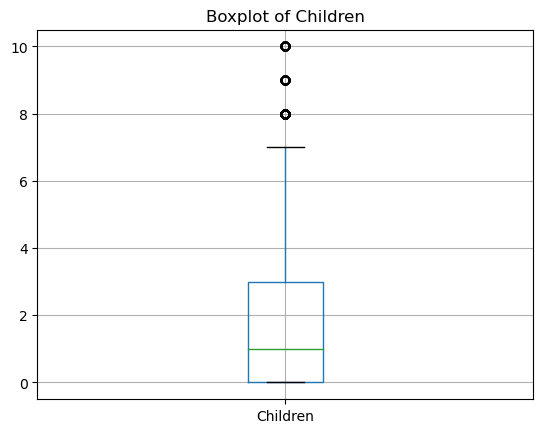

Children has 401 outliers


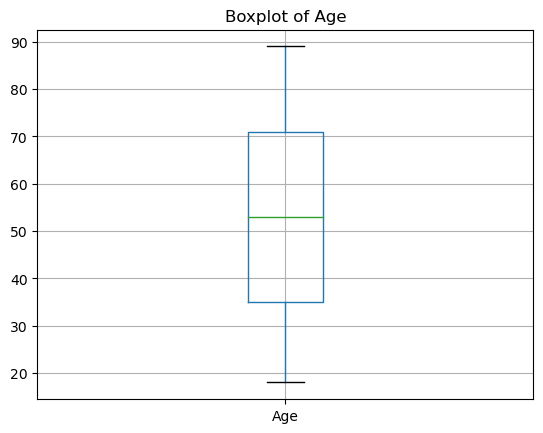

Age has 0 outliers


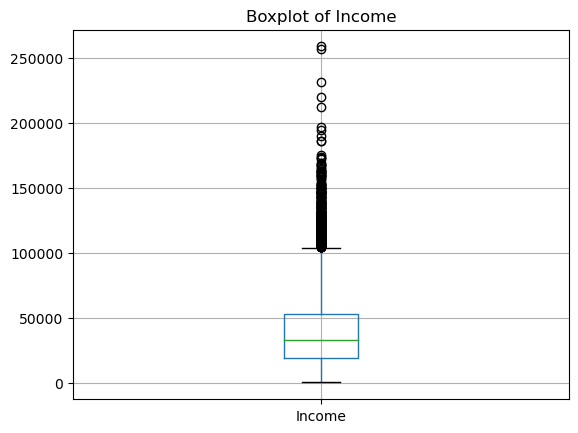

Income has 336 outliers

Value counts for Marital
Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: Marital, dtype: int64


Value counts for Gender
Female       5025
Male         4744
Nonbinary     231
Name: Gender, dtype: int64


Value counts for Churn
No     7350
Yes    2650
Name: Churn, dtype: int64



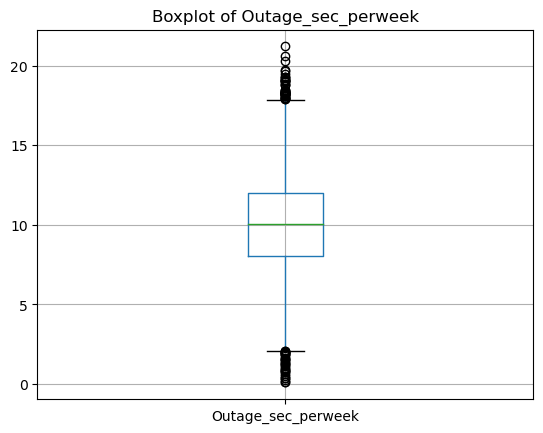

Outage_sec_perweek has 76 outliers


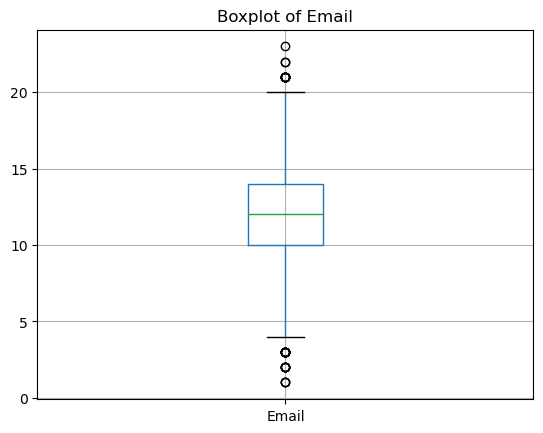

Email has 38 outliers


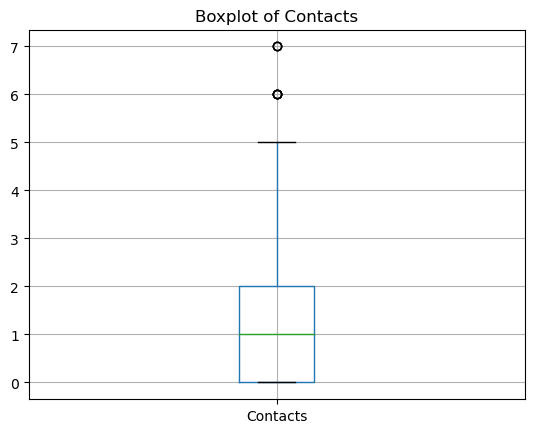

Contacts has 8 outliers


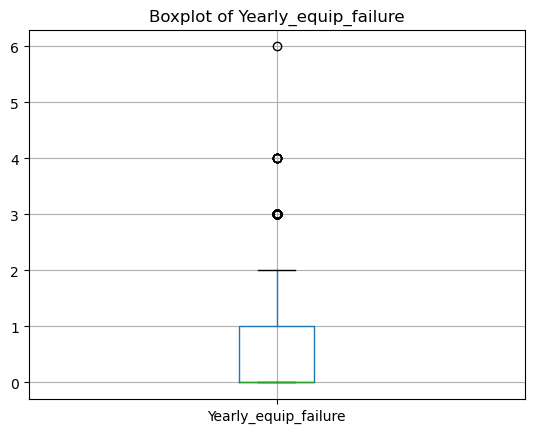

Yearly_equip_failure has 94 outliers

Value counts for Techie
No     8321
Yes    1679
Name: Techie, dtype: int64


Value counts for Contract
Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64


Value counts for Port_modem
No     5166
Yes    4834
Name: Port_modem, dtype: int64


Value counts for Tablet
No     7009
Yes    2991
Name: Tablet, dtype: int64


Value counts for InternetService
Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64


Value counts for Phone
Yes    9067
No      933
Name: Phone, dtype: int64


Value counts for Multiple
No     5392
Yes    4608
Name: Multiple, dtype: int64


Value counts for OnlineSecurity
No     6424
Yes    3576
Name: OnlineSecurity, dtype: int64


Value counts for OnlineBackup
No     5494
Yes    4506
Name: OnlineBackup, dtype: int64


Value counts for DeviceProtection
No     5614
Yes    4386
Name: DeviceProtection, dtype: int64


Value counts for TechSupport
No

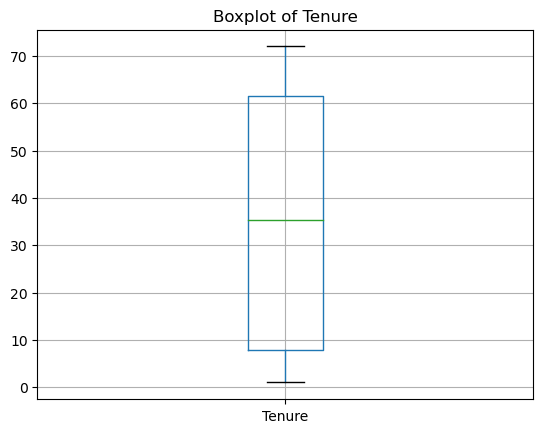

Tenure has 0 outliers


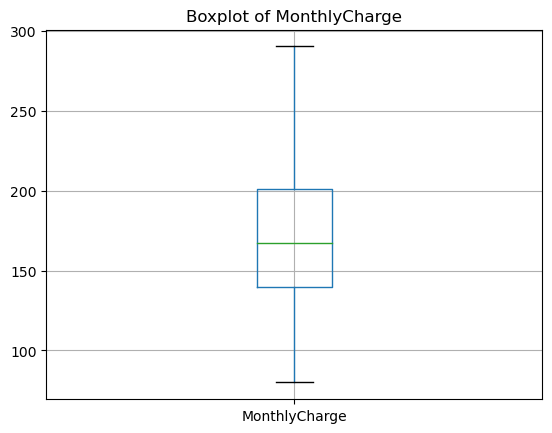

MonthlyCharge has 0 outliers


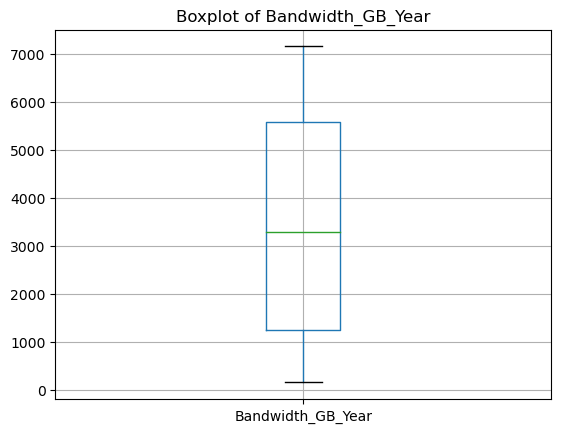

Bandwidth_GB_Year has 0 outliers


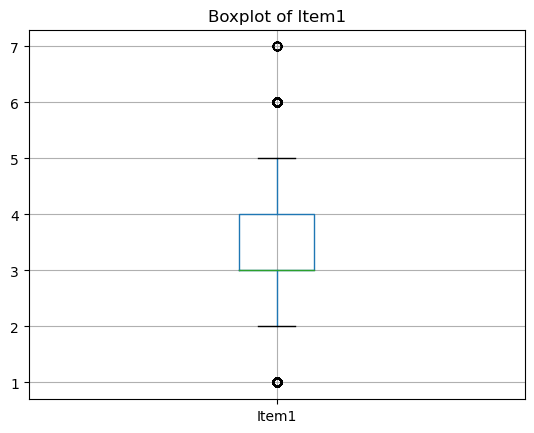

Item1 has 442 outliers


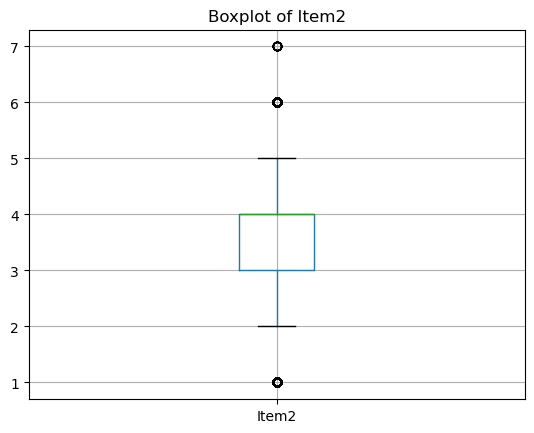

Item2 has 445 outliers


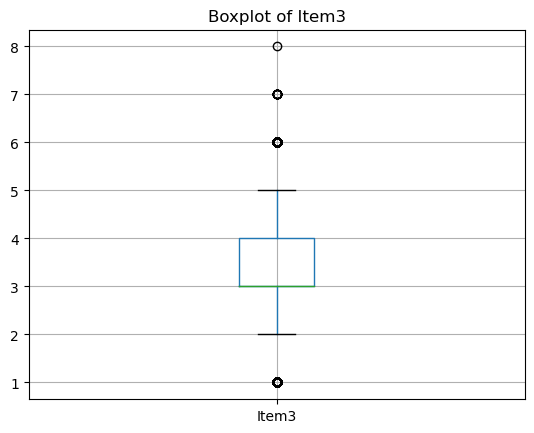

Item3 has 418 outliers


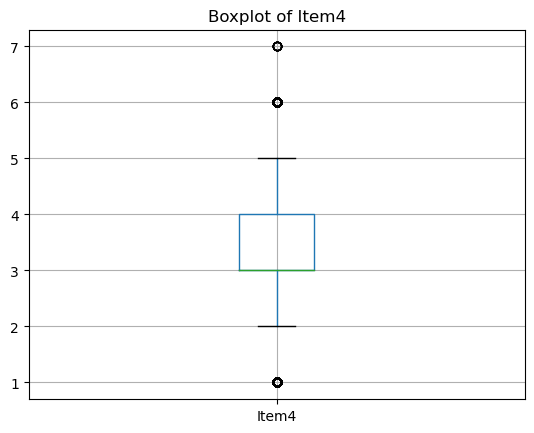

Item4 has 433 outliers


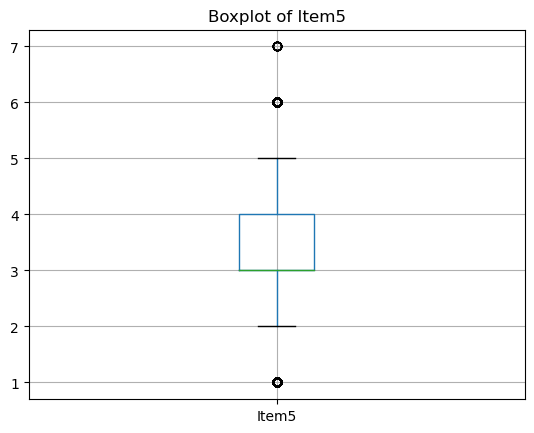

Item5 has 422 outliers


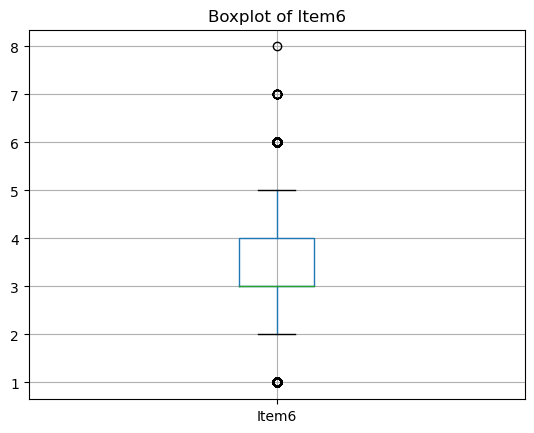

Item6 has 413 outliers


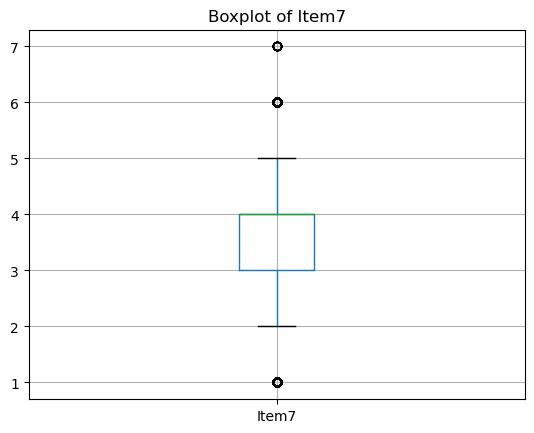

Item7 has 454 outliers


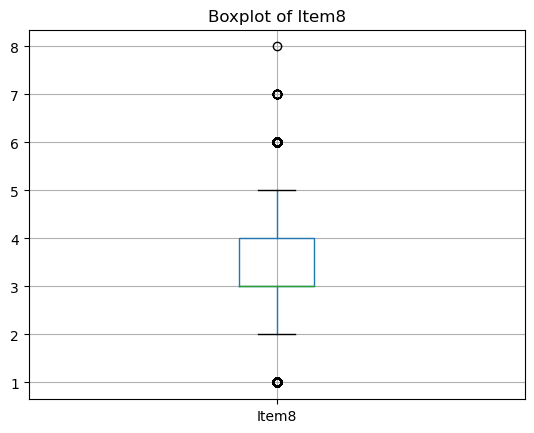

Item8 has 426 outliers


In [16]:
# Create boxplot and if outliers exist, calculate using IQR method
for col in columns:
    if df[col].dtype != 'object':
        # Create boxplot
        df.boxplot(column=col)
        plt.title(f'Boxplot of {col}')
        plt.show()
        
        # Calculate IQR lower and upper bounds to determine outliers
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count and display outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        num_outliers = outliers.shape[0]
        print(f"{col} has {num_outliers} outliers")     
        
        
    else:
        # For categorical variables, determine if any category makes up a small percentage
        print()
        print(f'Value counts for {col}')
        print(df[col].value_counts())
        print()

# Encoding

In [18]:
df = df.copy()

In [19]:
# Encode yes/no columns with simple replacement
yes_no_columns = ['Churn', 'Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                  'PaperlessBilling']

df[yes_no_columns] = df[yes_no_columns].replace({'No': 0, 'Yes': 1})

In [21]:
# One-hot encoding for remaining categorical variables (NumFOCUS, 2024)
df_encoded = pd.get_dummies(df, columns=['Area', 'Marital', 'Gender', 'Contract', 'InternetService',
                                         'PaymentMethod'], drop_first=True)
df_encoded.columns

Index(['Children', 'Age', 'Income', 'Churn', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Techie', 'Port_modem', 'Tablet',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8',
       'Area_Suburban', 'Area_Urban', 'Marital_Married',
       'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed',
       'Gender_Male', 'Gender_Nonbinary', 'Contract_One year',
       'Contract_Two Year', 'InternetService_Fiber Optic',
       'InternetService_None', 'PaymentMethod_Credit Card (automatic)',
       'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check'],
      dtype='object')

In [29]:
# Assign features to X and label to y
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [ ]:
# Export prepared data to CSV
df_encoded.to_csv('Prepared Churn.csv', index=False)

In [30]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [36]:
#Initialize a StandardScaler object
scaler = StandardScaler()

# Apply StandardScaler to training data
X_train_scaled = scaler.fit_transform(X_train)

# Apply StandardScaler to test data
X_test_scaled = scaler.fit_transform(X_test)

In [38]:
# Export training and test datasets
np.savetxt('X_train_scaled.csv', X_train_scaled, delimiter=',')
np.savetxt('X_test_scaled.csv', X_test_scaled, delimiter=',')
np.savetxt('y_train.csv', y_train, delimiter=',')
np.savetxt('y_test.csv', y_test, delimiter=',')

# Modeling

In [41]:
knn = KNN(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [57]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

TN = conf_matrix[0,0]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]
TP = conf_matrix[1,0]

print(f'TN: {TN}')
print(f'FN: {FN}')
print(f'FP: {FP}')
print(f'TP: {TP}')

accuracy = (TN + TP)/ (TN + FN + FP + TP)
print(f'Accuracy: {accuracy}')

precision = TP / (FP+TP)
print(f'Precision: {precision}')

recall = TP / (FN+TP)
print(f'Recall: {recall}')

print(knn.score(X_train_scaled, y_train))
print(knn.score(X_test_scaled, y_test))

[[1344  126]
 [ 230  300]]
TN: 1344
FN: 230
FP: 126
TP: 230
Accuracy: 0.8155440414507772
Precision: 0.6460674157303371
Recall: 0.5
0.888875
0.822


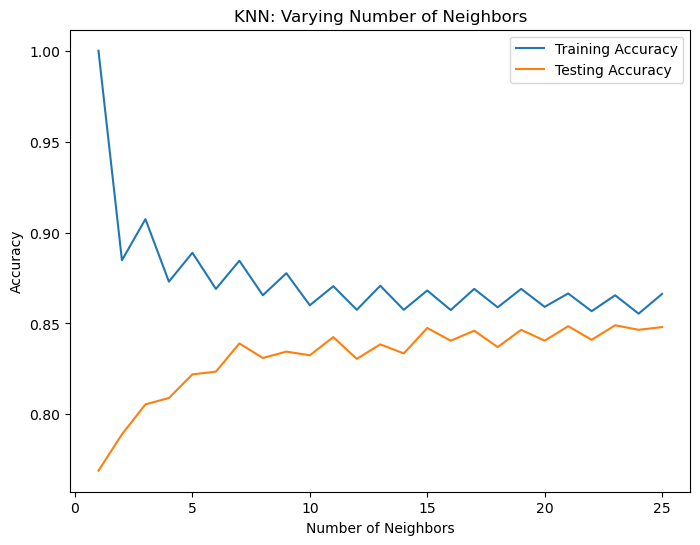

In [59]:
train_accuracies = {}
test_accuracies = {}

neighbors = np.arange(1,26)
for neighbor in neighbors:
    knn = KNN(n_neighbors=neighbor)
    knn.fit(X_train_scaled, y_train)
    train_accuracies[neighbor] = knn.score(X_train_scaled, y_train)
    test_accuracies[neighbor] = knn.score(X_test_scaled, y_test)
    


In [ ]:
plt.figure(figsize=(8,6))
plt.title('KNN: Varying Number of Neighbors')
plt.plot(neighbors, train_accuracies.values(), label='Training Accuracy')
plt.plot(neighbors, test_accuracies.values(), label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

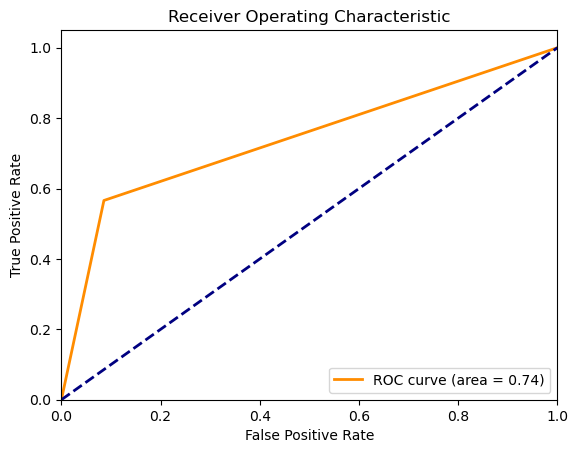

In [60]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(fpr, tpr)

roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()